In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [126]:
dataset = pd.read_csv('/content/customer_segmentation.csv', on_bad_lines='skip', encoding='latin-1')

In [127]:
dataset = dataset.sample(n=500, random_state=0)

In [128]:
dataset = dataset.reset_index(drop=True)

In [129]:
print("Original dataset size:", len(dataset))
print("Reduced dataset size:", len(dataset))
print(dataset.head())

Original dataset size: 500
Reduced dataset size: 500
  InvoiceNo StockCode                         Description  Quantity  \
0    570410     22396       MAGNETS PACK OF 4 RETRO PHOTO         1   
1    579467     23560      SET OF 6 RIBBONS COUNTRY STYLE         6   
2    572550     23567          EGG CUP HENRIETTA HEN PINK         1   
3    574301     20749          ASSORTED COLOUR MINI CASES         4   
4    550921     21977  PACK OF 60 PINK PAISLEY CAKE CASES        24   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  10/10/2011 13:04       0.39     16776.0  United Kingdom  
1  11/29/2011 14:57       2.89     15755.0  United Kingdom  
2  10/24/2011 17:06       2.46         NaN  United Kingdom  
3   11/3/2011 16:15       7.95     12544.0           Spain  
4   4/21/2011 14:21       0.55     14770.0  United Kingdom  


In [130]:
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,570410,22396,MAGNETS PACK OF 4 RETRO PHOTO,1,10/10/2011 13:04,0.39,16776.0,United Kingdom
1,579467,23560,SET OF 6 RIBBONS COUNTRY STYLE,6,11/29/2011 14:57,2.89,15755.0,United Kingdom
2,572550,23567,EGG CUP HENRIETTA HEN PINK,1,10/24/2011 17:06,2.46,NaN,United Kingdom
3,574301,20749,ASSORTED COLOUR MINI CASES,4,11/3/2011 16:15,7.95,12544.0,Spain
4,550921,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,4/21/2011 14:21,0.55,14770.0,United Kingdom
...,...,...,...,...,...,...,...,...
495,576077,23374,RED SPOT PAPER GIFT BAG,20,11/13/2011 16:22,0.82,16720.0,United Kingdom
496,576388,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,11/15/2011 10:00,2.95,17510.0,United Kingdom
497,574547,23138,SINGLE WIRE HOOK IVORY HEART,3,11/4/2011 15:08,1.45,17841.0,United Kingdom
498,573038,22097,SWALLOW SQUARE TISSUE BOX,1,10/27/2011 13:48,0.39,17545.0,United Kingdom


In [131]:
dataset = dataset.dropna()

In [132]:
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,570410,22396,MAGNETS PACK OF 4 RETRO PHOTO,1,10/10/2011 13:04,0.39,16776.0,United Kingdom
1,579467,23560,SET OF 6 RIBBONS COUNTRY STYLE,6,11/29/2011 14:57,2.89,15755.0,United Kingdom
3,574301,20749,ASSORTED COLOUR MINI CASES,4,11/3/2011 16:15,7.95,12544.0,Spain
4,550921,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,4/21/2011 14:21,0.55,14770.0,United Kingdom
11,561322,23204,CHARLOTTE BAG APPLES DESIGN,10,7/26/2011 13:03,0.85,15203.0,United Kingdom
...,...,...,...,...,...,...,...,...
493,555403,POST,POSTAGE,1,6/2/2011 18:06,40.00,12676.0,Sweden
495,576077,23374,RED SPOT PAPER GIFT BAG,20,11/13/2011 16:22,0.82,16720.0,United Kingdom
496,576388,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,11/15/2011 10:00,2.95,17510.0,United Kingdom
497,574547,23138,SINGLE WIRE HOOK IVORY HEART,3,11/4/2011 15:08,1.45,17841.0,United Kingdom


In [133]:
features = dataset[['Quantity', 'UnitPrice']]

In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

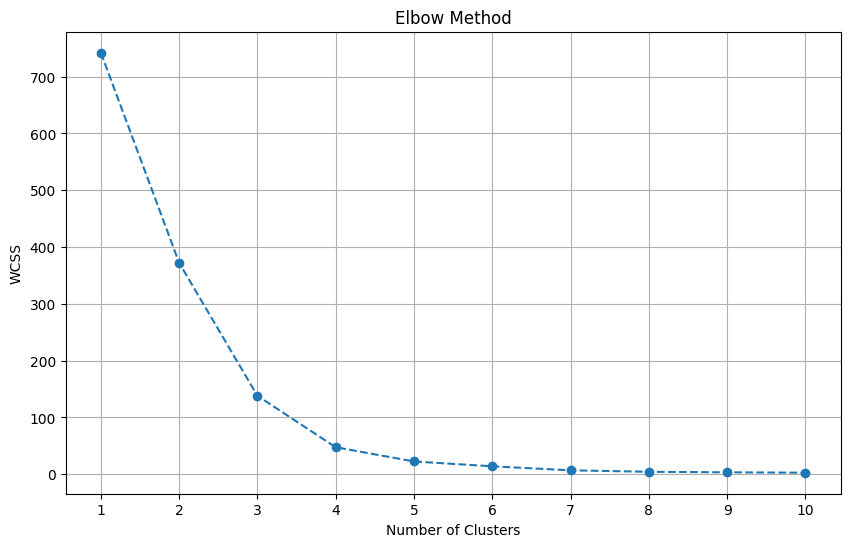

In [135]:
wcss = []
# You can adjust the range of clusters to test
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10) # Add n_init to suppress FutureWarning
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [136]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)

In [137]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.9242894235881575


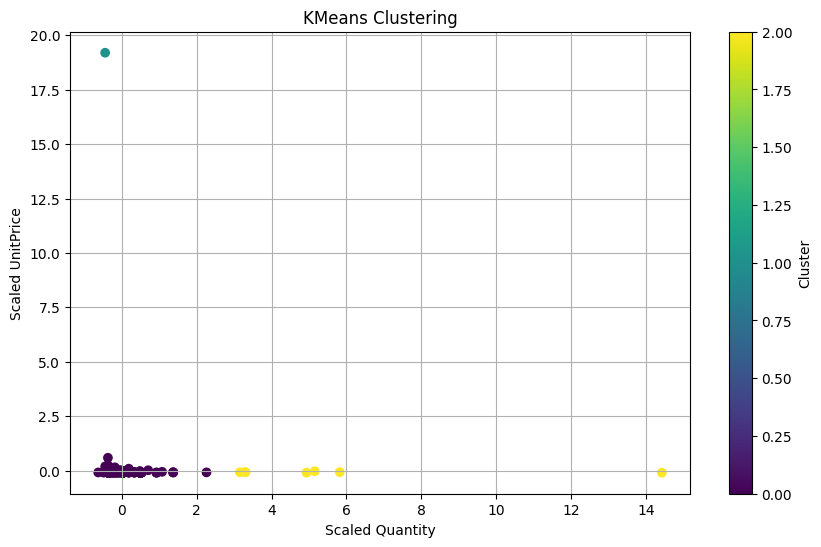

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Scaled Quantity')
plt.ylabel('Scaled UnitPrice')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

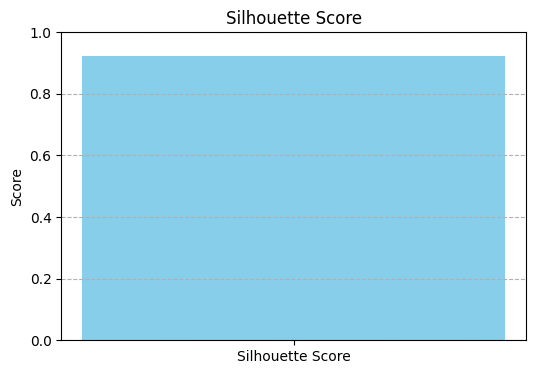

In [142]:
import matplotlib.pyplot as plt

# Assuming 'score' variable contains the silhouette score
score_label = 'Silhouette Score'
score_value = score  # Use the calculated silhouette score

plt.figure(figsize=(6, 4))
plt.bar(score_label, score_value, color='skyblue')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.ylim(0, 1) # Silhouette scores range from -1 to 1
plt.grid(axis='y', linestyle='--')
plt.show()